Question 1.
"Standard error of the mean" is measured from standard deviation of bootstrapped means and so it measures how precise the estimate of the sample mean is. It tells us how much the sample mean is expected to vary between samples. Overall, it shows the variability of the sample mean.

"Standard deviation" of the original data is the how spread out the original sample data points are around the mean. It is the variability of data points in a sample. A higher value means the data points are more spread out while a lower value means the data points are closer to the mean. Overall, it shows the spread of the original data. 

Question 2.
Using the standard error of the mean to create a 95% confidence interval which covers 95% of the bootstrapped sample means:
1. Calculate the sample mean
2. Calculate the standard error of the mean
3. Multiply the standard error of the mean by 2 and add and subtract it from the mean. This will give the 95% confidence interval with the upper and lower bounds: mean + 2(standard error of the mean) and mean - 2(standard error of the mean). 

Question 3. 
Steps to create a 95% bootstrapped confidence interval using bootstrapped means
1. Take bootstrapped samples from an original population sample
2. Calculate the mean for each boostrapped sample and graph them.
3. Sort the bootstrapped means and find the 2.5th and 97.5th percentiles, which are the lower and upper bounds of the 95% confidence interval. 

Question 4. 

In [6]:
import numpy as np

# Function to perform bootstrap resampling and calculate confidence interval
def bootstrap_ci(data, num_resamples=10000, ci=95, statistic_func=np.mean):
    """
    Calculate a bootstrap confidence interval for a given statistic (mean by default).
    
    Parameters:
    data (array-like): The sample data
    num_resamples (int): Number of bootstrap resamples (default is 10,000)
    ci (int): The confidence interval percentage (default is 95%)
    statistic_func (function): The statistic to compute (default is np.mean)

    Returns:
    tuple: Lower and upper bounds of the confidence interval
    """
    # Store the bootstrapped statistic values
    bootstrapped_stats = []
    
    # Perform the bootstrap process
    for _ in range(num_resamples):
        # Resample the data with replacement
        resample = np.random.choice(data, size=len(data), replace=True)
        # Calculate the statistic (mean by default) for the resample
        bootstrapped_stats.append(statistic_func(resample))
    
    # Compute the lower and upper percentiles for the confidence interval
    lower_percentile = (100 - ci) / 2
    upper_percentile = 100 - lower_percentile
    # Return the confidence interval bounds
    return np.percentile(bootstrapped_stats, [lower_percentile, upper_percentile])


# Sample data (replace with your own data)
sample_data = np.random.normal(50, 10, size=100)  # Example: 100 random points from a normal distribution

# Calculate the 95% bootstrap confidence interval for the population mean
mean_ci = bootstrap_ci(sample_data)
print(f"95% Bootstrap Confidence Interval for the Mean: {mean_ci}")

# To calculate the 95% bootstrap confidence interval for the population median:
# Change the statistic_func to np.median
median_ci = bootstrap_ci(sample_data, statistic_func=np.median)
print(f"95% Bootstrap Confidence Interval for the Median: {median_ci}")


95% Bootstrap Confidence Interval for the Mean: [48.38167456 52.35648319]
95% Bootstrap Confidence Interval for the Median: [47.65999852 51.11129375]


Pre-lecture HW chatgpt link:https://chatgpt.com/c/66fc9f46-1348-8007-b29a-8972ec19b9c2 and summary: We discussed the standard error of the mean (SEM), its role in creating a 95% confidence interval for the mean, and the difference between SEM and standard deviation. I then provided Python code to calculate a 95% bootstrap confidence interval for the population mean, along with instructions on how to modify it to compute the interval for the median by changing the statistical function used.

Question 5. 
We need to distinguish between the population parameter and sample statistic because the population parameter is a fixed, unknown value that describes some characteristic of the entire population while the sample statistics are calculated values from a sample that reflect the corresponding population parameter. Sample Statistic is the starting point for the confidence interval but the interval accounts for the fact that this statistic may not match the true population parameter. Confidence level indicates the degree of certainty we have that the confidence interval contains the true population parameter, but it is NOT the chance that the population parameter is in the confidence interval. 

Question 6.
1. Bootstrapping is taking a set of data and simulating it over and over with the possibility of the same data points being taken. For example, if the data set is a bag of marbles with different colours, bootstrapping would be taking one out and recording it's colour, but then placing it back in before taking another marble out. Doing this for the number of marbles inside the bag would be a bootstrapped sample of the bag of marbles.
2. Bootstrapping is a way to figure out how reliable a result is by creating many new samples from your original data. By testing each new sample, you can see how much the result might change and get a better idea of how accurate it is.
3. You could take bootstrapped samples of size n and calculate each mean. Then graph all the bootstrapped means and see if the hypothesized guess is in the middle 95% of the distribution. If it is, then it is plausible.

Question 7.
A confidence interval overlapping zero 'fails to reject the null hypothesis' because zero shows that the the drug has no effect on the subjects, and since it is in the 95% confidence interval, it is a result in 95% of the samples. This means the data is not strong enough to exclude it. If zero did not fall in the confidence interval, then we can chose to reject the null hypothesis since zero is far enough from the mean that it is not plausible. 

chatgpt link: https://chatgpt.com/c/66fcaa0b-6908-8007-a5ea-8b72a481e8f1 and summary for question 5, 6 & 7: In our conversation, we discussed several statistical concepts, including confidence intervals, bootstrapping, and hypothesis testing. I explained how bootstrapping can be used to assess the plausibility of a hypothesized population mean, and we explored how confidence intervals relate to the null hypothesis. You also provided a dataset for which I created a line plot showing the initial and final health scores by age. Finally, I attempted to create a visualization using bootstrapping, but due to a technical issue, I was unable to complete that part.

Question 8.

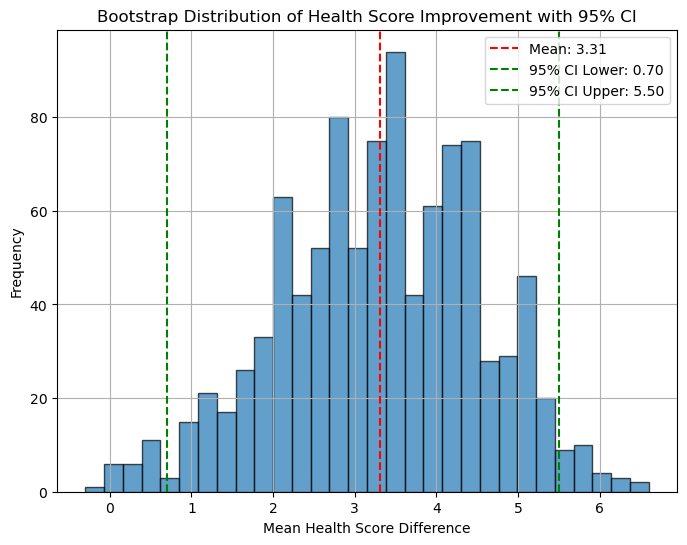

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Creating the data
data = {
    'PatientID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Age': [45, 34, 29, 52, 37, 41, 33, 48, 26, 39],
    'Gender': ['M', 'F', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'F'],
    'InitialHealthScore': [84, 78, 83, 81, 81, 80, 79, 85, 76, 83],
    'FinalHealthScore': [86, 86, 80, 86, 84, 86, 86, 82, 83, 84]
}

# Convert the data into a DataFrame
df = pd.DataFrame(data)

# Saving the data into a CSV file
csv_file_path = 'health_scores_data.csv'
df.to_csv(csv_file_path, index=False)

# Reading the CSV file
df_from_csv = pd.read_csv(csv_file_path)

# Calculate the difference between final and initial health scores
df_from_csv['HealthScoreDifference'] = df_from_csv['FinalHealthScore'] - df_from_csv['InitialHealthScore']

# Setting the seed for reproducibility
np.random.seed(42)

# Bootstrapping: resample with replacement based on the HealthScoreDifference
bootstrap_samples = 1000
bootstrap_means = []
for _ in range(bootstrap_samples):
    sample = df_from_csv.sample(frac=1, replace=True)
    mean_diff = sample['HealthScoreDifference'].mean()
    bootstrap_means.append(mean_diff)

# Calculating the mean and 95% confidence interval
mean_diff = np.mean(bootstrap_means)
lower_bound = np.percentile(bootstrap_means, 2.5)
upper_bound = np.percentile(bootstrap_means, 97.5)

# Plotting the histogram
plt.figure(figsize=(8, 6))
plt.hist(bootstrap_means, bins=30, edgecolor='k', alpha=0.7)

# Plotting the mean and confidence interval
plt.axvline(mean_diff, color='r', linestyle='--', label=f'Mean: {mean_diff:.2f}')
plt.axvline(lower_bound, color='g', linestyle='--', label=f'95% CI Lower: {lower_bound:.2f}')
plt.axvline(upper_bound, color='g', linestyle='--', label=f'95% CI Upper: {upper_bound:.2f}')

# Adding labels and title
plt.title('Bootstrap Distribution of Health Score Improvement with 95% CI')
plt.xlabel('Mean Health Score Difference')
plt.ylabel('Frequency')
plt.legend()

# Showing the plot
plt.grid(True)
plt.show()

Problem Introduction:
In the context of this data, a null hypothesis of "no effect" on a graph showing the differences of the intial and final health score would mean that a plausible result is no change in the patient's health. This would mean that 0 would land in the 95% confidence interval, meaning that it is plausible that the vaccine is not effective at all.  

Quantitative Analysis:
First, the difference between the initial and final health score of each patient was calcualted. This is because we can only bootstrap the results of one set of data and cannot combine a bootstrapped inital health with bootstrapped final health data to get the difference, as that will not be consistent with the original individual patient results. Then, the original difference of health scores was bootstrapped with sampling with replacement 1000 times. This allows for a higher reliability since we are simulating the data so many times. The mean was then taken of the bootstrapped samples and graphed. This is shown in the graph above.

Findings and Discussion:
Seen in the graph above, the null hypothesis of "no effect", which has a value of 0 mean health difference score, is not in the 95% confidence interval. This means that the vaccine having no effect on the patient is not plausible. 

Further Considerations:
Although the data shows that the vaccine does have an effect on majority of patients, the original sample size was of only 10 patients, which can be very biased. Future tests should have larger inital sample sizes that are also ideally diverse, which could increase the reliability and accuracy of the data to represent the whole population. Also, the analysis only focuses on health score differences, but other factors, such as patient age or gender, might influence the health outcomes. 

chatgpt link:https://chatgpt.com/c/66fdf2ed-66d0-800b-a902-c5ec2051a29b and summary for question 8: In this conversation, you provided health data and requested a data visualization using bootstrapping and the np.random.seed() function. I guided you through creating a CSV file from the data, reading it into a Python environment, calculating the difference between initial and final health scores, and performing bootstrapping. We generated a histogram showing the mean difference and added the 95% confidence interval to the graph. Lastly, I offered findings and a discussion on rejecting the null hypothesis (no effect), concluding that the intervention likely improved health scores, and suggested further considerations for future analysis.

Question 9. Mostly